## Homework 2 
## Machine Learning 598 
#### Rommel Fernandes 
#### Ali Alshamali
#### Shujian Hao

In [1]:
import pandas as pd
from matplotlib import pyplot as plt   #import key modules 
import numpy as np

### Load the data set 

In [2]:
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()  

### Put data into Pandas Data Frame 

In [3]:
data = pd.DataFrame(diabetes_dataset['data'])
target = pd.DataFrame(diabetes_dataset['target'])
target = target.rename(columns={0:'Target'})
data.describe() # Describe the data set 

,0,1,2,3,4,5,6,7,8,9
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


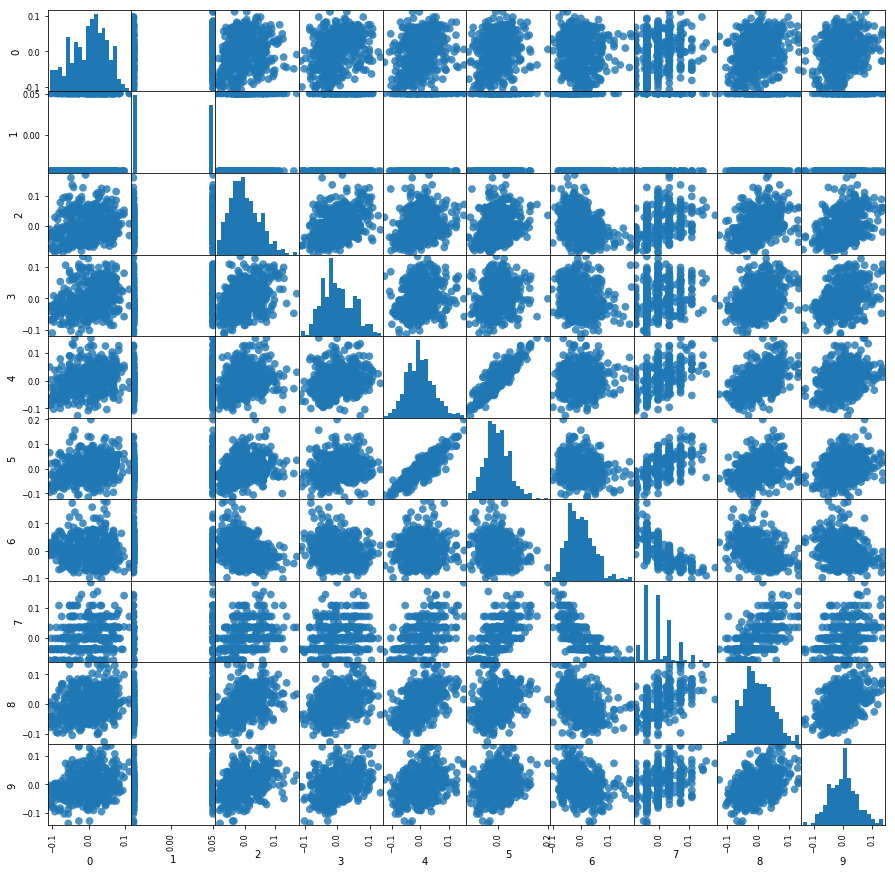

In [4]:
pd.plotting.scatter_matrix(data, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()

### Question 1 

Ouput data for feature: 0
Coefficients: 325.742430445
Intercept: 152.728806476
Coefficient Of Determination: -0.12


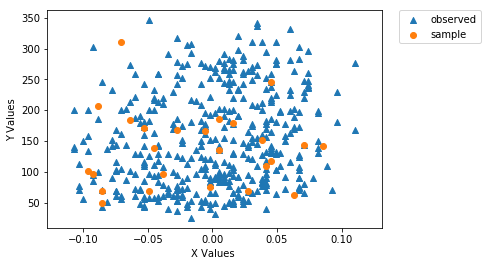

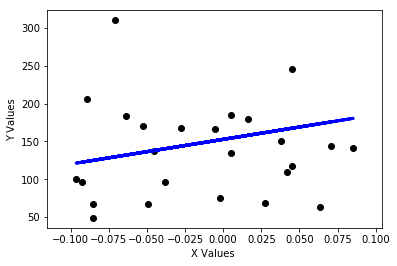

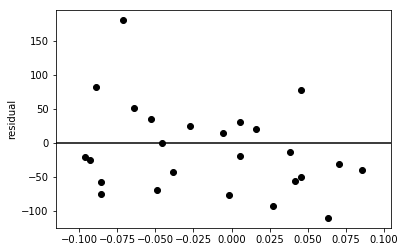

-------------------------------------------------------------------------------------------
Ouput data for feature: 1
Coefficients: 77.4745264622
Intercept: 152.997051187
Coefficient Of Determination: -0.07


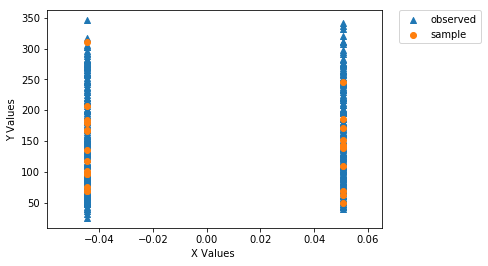

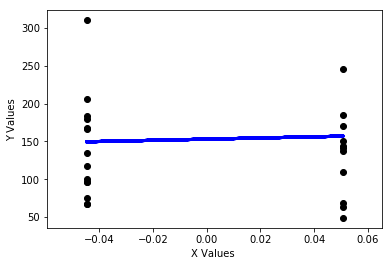

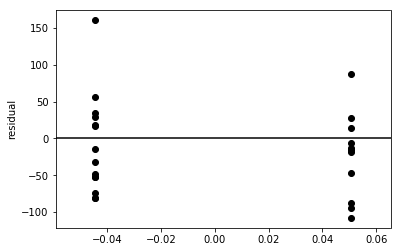

-------------------------------------------------------------------------------------------
Ouput data for feature: 2
Coefficients: 959.561021752
Intercept: 152.816268954
Coefficient Of Determination: 0.12


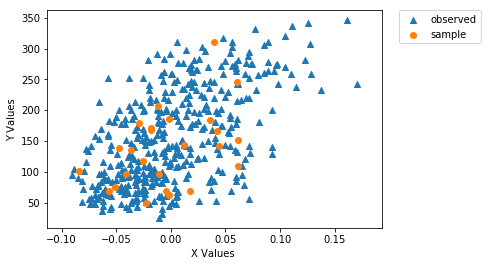

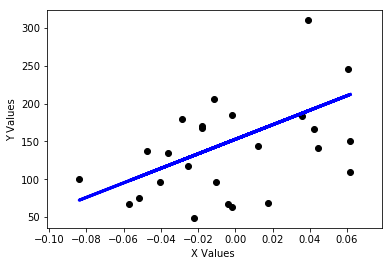

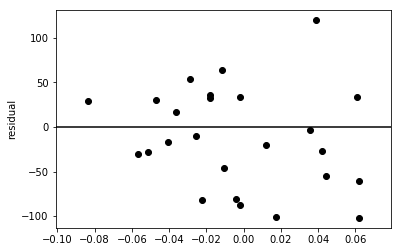

-------------------------------------------------------------------------------------------
Ouput data for feature: 3
Coefficients: 733.373836594
Intercept: 152.939901118
Coefficient Of Determination: -0.18


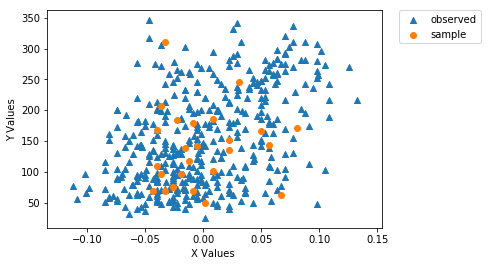

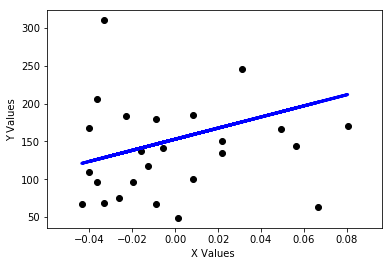

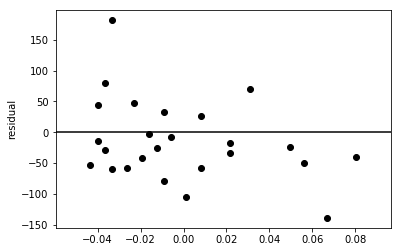

-------------------------------------------------------------------------------------------
Ouput data for feature: 4
Coefficients: 344.069302211
Intercept: 152.837585566
Coefficient Of Determination: -0.01


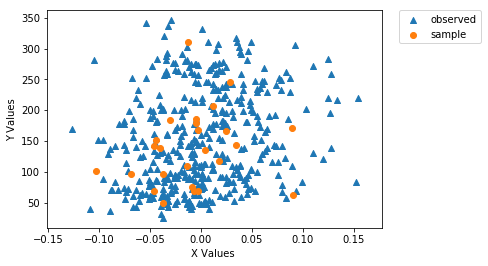

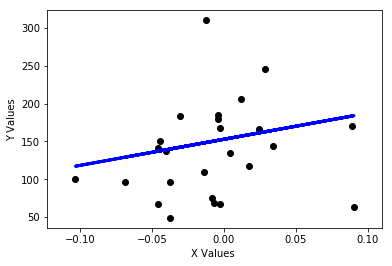

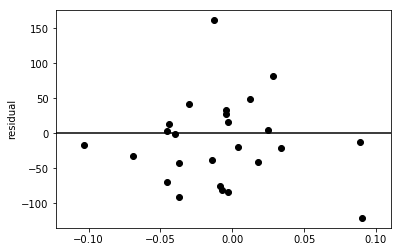

-------------------------------------------------------------------------------------------
Ouput data for feature: 5
Coefficients: 302.986790689
Intercept: 152.888343496
Coefficient Of Determination: -0.15


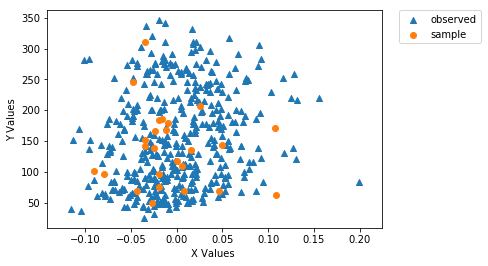

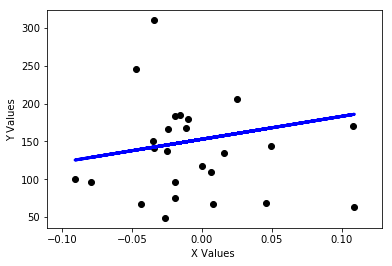

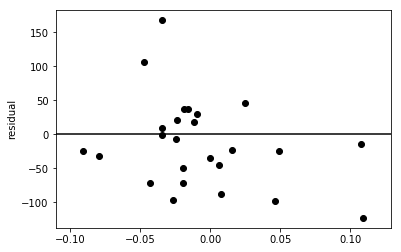

-------------------------------------------------------------------------------------------
Ouput data for feature: 6
Coefficients: -649.985615182
Intercept: 152.996459676
Coefficient Of Determination: -0.03


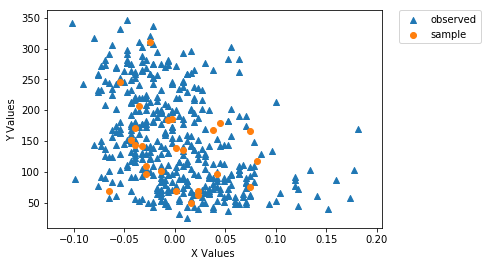

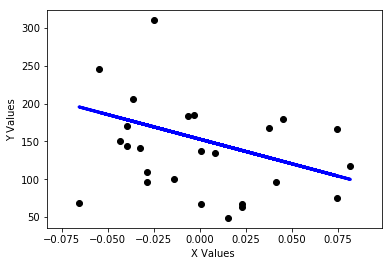

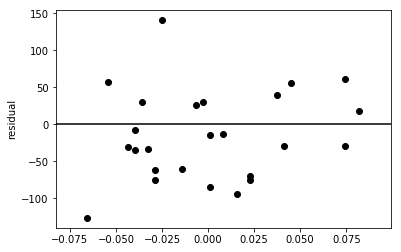

-------------------------------------------------------------------------------------------
Ouput data for feature: 7
Coefficients: 708.35065105
Intercept: 152.683249207
Coefficient Of Determination: 0.03


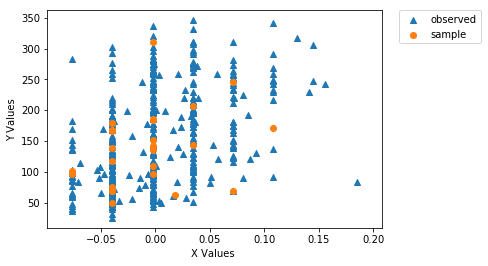

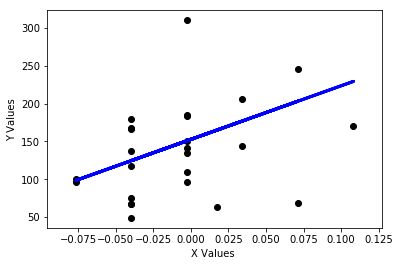

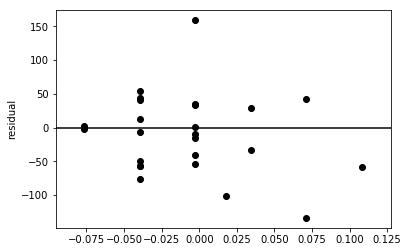

-------------------------------------------------------------------------------------------
Ouput data for feature: 8
Coefficients: 913.418198031
Intercept: 152.408092788
Coefficient Of Determination: 0.60


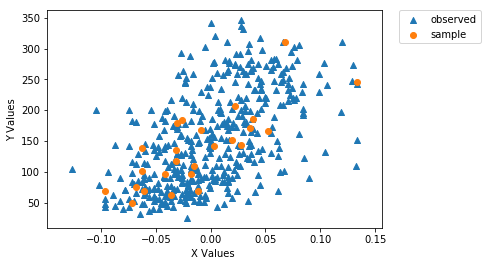

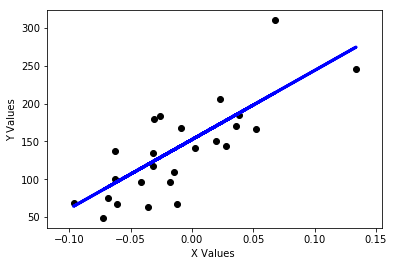

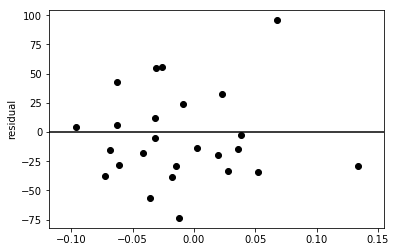

-------------------------------------------------------------------------------------------
Ouput data for feature: 9
Coefficients: 628.428414056
Intercept: 152.145012645
Coefficient Of Determination: 0.09


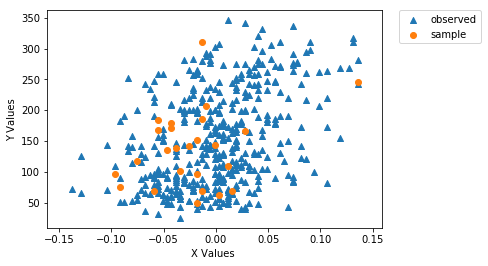

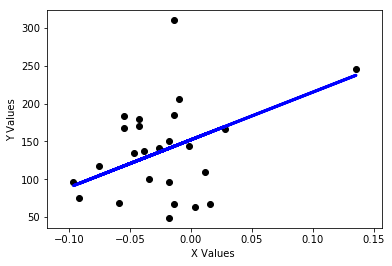

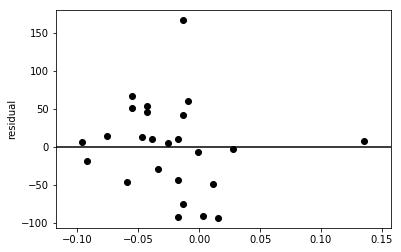

-------------------------------------------------------------------------------------------


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear = LinearRegression() # Define Linear Regression Class
coeff_of_det = []  # Store Coefficent values 
coeff = []
intercept = []
res = {} # store residual values 

for i in list(data):
    X_train = data.iloc[25:,i].to_frame()   # Define the data 
    y_train = target.iloc[25:,0]
    X_test = data.iloc[0:25,i].to_frame()
    y_test = target.iloc[0:25,0].to_frame()
    lm = linear.fit(X_train, y_train)
    diabetes_predict = lm.predict(X_test)
    residuals = y_test.values.ravel() - diabetes_predict # Calculate the residuals 
    res[i]=residuals  
    
    # print labled data 
    print('Ouput data for feature:', i)
    print('Coefficients:', lm.coef_[0])
    print('Intercept:', lm.intercept_)
    print('Coefficient Of Determination: %.2f' % r2_score(y_test, diabetes_predict))
    coeff.append(lm.coef_[0])
    intercept.append(lm.intercept_)
    coeff_of_det.append( r2_score(y_test, diabetes_predict))    

    # plot observed values and sample values 
    plt.scatter(X_train,y_train, marker='^', label = 'observed')
    plt.scatter(X_test, y_test, marker='o', label = 'sample')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel("Y Values")
    plt.xlabel("X Values ")
    plt.show()
    
    # plot predicted values and best fit line
    plt.scatter(X_test, y_test, color = 'black')
    plt.plot(X_test, diabetes_predict, color = 'blue', linewidth = 3)
    plt.ylabel("Y Values")
    plt.xlabel("X Values ")
    plt.show()

    # plot the residuals 
    plt.scatter(X_test, residuals, color = 'black')
    plt.axhline(0, color = 'black')
    plt.ylabel("residual")
    plt.show()
    print("-------------------------------------------------------------------------------------------")

#### Summary Table 

In [6]:
table = {'coefficient': coeff, 'intercept': intercept, 'coefficient of determination': coeff_of_det}
df =pd.DataFrame(table)

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

df.style.apply(highlight_min).apply(highlight_max)

,coefficient,coefficient of determination,intercept
0,325.742,-0.118212,152.729
1,77.4745,-0.0739787,152.997
2,959.561,0.118047,152.816
3,733.374,-0.180449,152.94
4,344.069,-0.00973235,152.838
5,302.987,-0.14831,152.888
6,-649.986,-0.027919,152.996
7,708.351,0.0348066,152.683
8,913.418,0.604968,152.408
9,628.428,0.087004,152.145


### Question 2
Based on the data and graphs feature 8 has the highest coefficent of determination (r^2 value) beween the x and y values wiht a score close to 0.60. Featuere 3 has the loweest coefficent of determination between the x and y values. However, ignoring the coefficient of determination value, and looking at the data we see that feature 1 has the least explanation between the independent and dependent data. This shows that you have to look at the data in order to determine the fit of the model. In this case feature 1 is worse than feature 3, however feature 1's R^2 score is higher

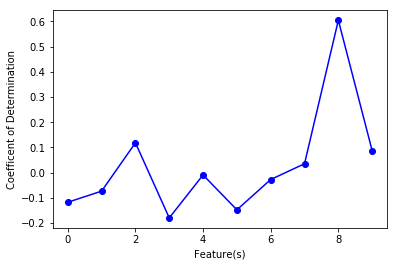

In [7]:
plt.plot(list(data),coeff_of_det, 'o-', color = 'blue')
plt.xlabel("Feature(s)")
plt.ylabel("Coefficent of Determination")
plt.show()

### Question 3
Feature 1 and Feature 7 show the least amount of randomnness when comparing the above data. There exists no real realationship between the x and y values at all. Again feature 8 shows the most amount of randomness within the observed and predeicted data, hence a higher R^2 score. 

### Question 4

In [8]:
linear_all = LinearRegression()
X_train = data.iloc[25:,:]
y_train = target.iloc[25:,0]
X_test = data.iloc[0:25,:]
y_test = target.iloc[0:25,0]
lm = linear_all.fit(X_train, y_train)
diabetes_predict = lm.predict(X_test)
print('Coefficients:', lm.coef_)
print('Intercept:', lm.intercept_)
print('Coefficient Of Determination: %.2f' % r2_score(y_test, diabetes_predict))

Coefficients: [   5.41270017 -226.31387714  530.67713034  329.06918491 -746.87791753
  448.42871479   75.09024644  166.16288365  710.12888525   74.15224565]
Intercept: 152.452617985
Coefficient Of Determination: 0.49


#### Attempt to remove features that dont explain the model

In [9]:
linear_r = LinearRegression()
features = [5,6,8]  # Only keeping features 5,6,8
X_train = data.iloc[25:,features]   
y_train = target.iloc[25:,0]
X_test = data.iloc[0:25,features]
y_test = target.iloc[0:25,0]
lm_r = linear_r.fit(X_train, y_train)
diabetes_predict1 = lm_r.predict(X_test)
print('Coefficients:', lm_r.coef_)
print('Intercept:', lm_r.intercept_)
print('Coefficient Of Determination: %.2f' % r2_score(y_test, diabetes_predict1))

Coefficients: [ -28.55451594 -343.41850303  782.15596779]
Intercept: 152.499019228
Coefficient Of Determination: 0.56


We attempted to remove features that had bad residuals or low R^2 values ad add it in the model. However doin this decreased the overall R^2 model

### Question 5 

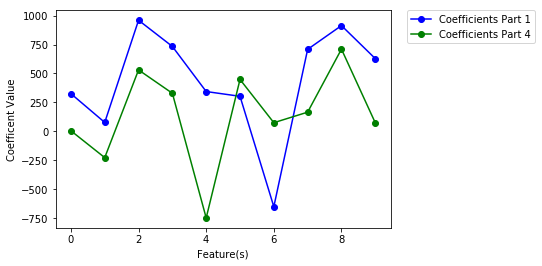

In [10]:
plt.plot(list(data), coeff, 'o-', color = 'blue', label = 'Coefficients Part 1')
plt.plot(list(data), lm.coef_,'o-', color = 'green', label = 'Coefficients Part 4')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Feature(s)")
plt.ylabel("Coefficent Value")
plt.show()

As you can see the coefficents for the individal features done in part 1 is higher than that done in part 4. This could be because part 1, no Regularization is attempted for only one predictor variable. As you introduce more predictor varibles into the model as in part 4, you introduce the concept of regularization, allowing coeffcients to become smaller to minimize huge variations in predictions. 

#### Attempt at Ridge Regression (L2 Reguluarizaion )

In [11]:
# Ridge Regression 
from sklearn.linear_model import Ridge

X_train = data.iloc[25:,features]
y_train = target.iloc[25:,0]
X_test = data.iloc[0:25,features]
y_test = target.iloc[0:25,0]

# By varying the alpha parameter we see that l
ridge = Ridge(alpha = .001)
ridge_fit = ridge.fit(X_train, y_train)
diabetes_predict2 = ridge_fit.predict(X_test)
print('Coefficients:', ridge_fit.coef_)
print('Intercept:', ridge_fit.intercept_)
print('Coefficient Of Determination: %.2f' % r2_score(y_test, diabetes_predict2))

Coefficients: [ -28.19891098 -343.36421132  781.21879712]
Intercept: 152.49949516
Coefficient Of Determination: 0.56


#### Attempt Lasso Regression (L1 Regularization)

In [12]:
#Lasso Regression 
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso(alpha = .001 , max_iter = 100000)
lasso_fit = lasso.fit(X_train, y_train)
diabetes_predict3 = lasso_fit.predict(X_test)
print('Coefficients:', lasso_fit.coef_)
print('Intercept:', lasso_fit.intercept_)
print('Coefficient Of Determination: %.2f' % r2_score(y_test, diabetes_predict3))
print('Number of features used:', np.sum(lasso_fit.coef_ != 0))

Coefficients: [ -27.86921026 -343.05825665  781.62284395]
Intercept: 152.499103331
Coefficient Of Determination: 0.56
Number of features used: 3


In ridge and lasso resgession, decreasing alpha allows the coefficents to be less restricted.

#### Plot of Model Coefficients 

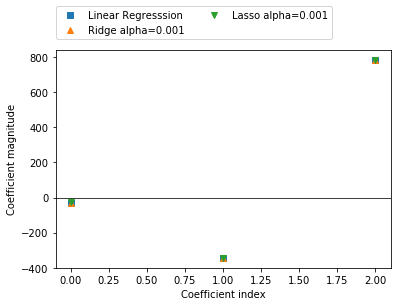

In [14]:
plt.plot(lm_r.coef_, 's', label="Linear Regresssion")
plt.plot(ridge_fit.coef_, '^', label="Ridge alpha=0.001")
plt.plot(lasso_fit.coef_, 'v', label="Lasso alpha=0.001")

plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.axhline(0, color = 'black', linewidth = 0.75)
plt.show()

There was no signinificant change in the Coefficient of Determinination score OLS, Lasso or Ridge Regression. We optimized alpha to have the models explain the most variance that it could within the data. 